# Heart Failure Prediction 
To predict whether the patient is going to have a heart failure or not.

### Importing the dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [62]:
data = pd.read_csv("Copy of Heart Failure Prediction.csv")

In [14]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Shape and Name. of columns

In [16]:
data.shape

(299, 13)

In [17]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [18]:
data.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [19]:
data.smoking.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (smoking)

### Checking missing values

In [20]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [21]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [22]:
categorical_val

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [23]:
have_disease = data.loc[data['smoking']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['smoking']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [24]:
have_disease = data.loc[data['smoking']==1, 'time'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['smoking']==0, 'time'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by smoking time", xlabel='time', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Time.I  :Bars   [index]   (time)
   .Bars.Time.II :Bars   [index]   (time)

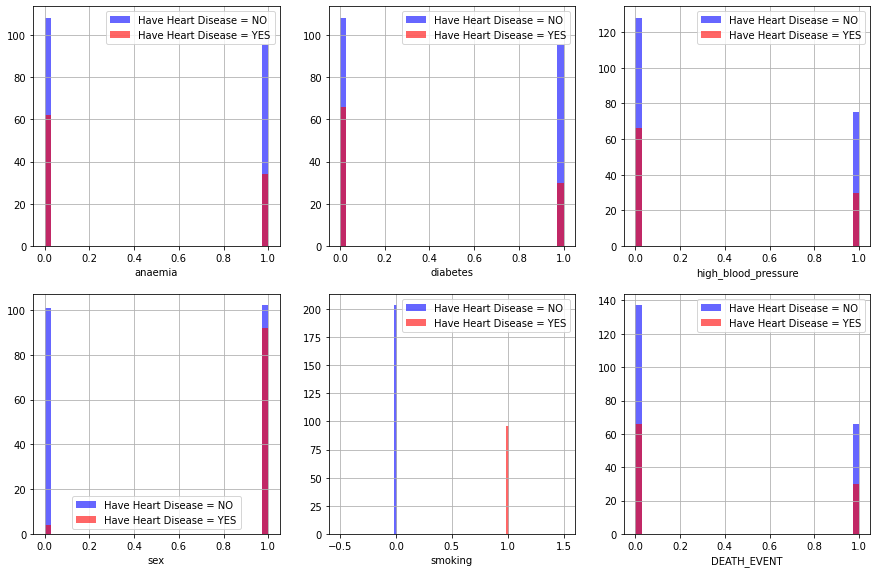

In [44]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["smoking"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["smoking"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

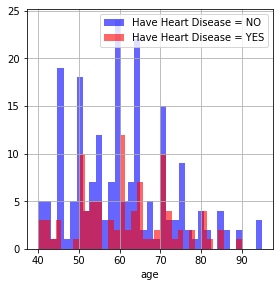

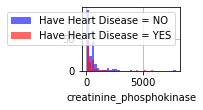

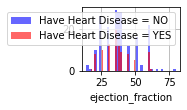

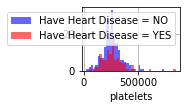

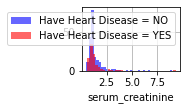

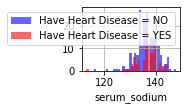

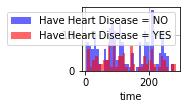

In [45]:
plt.figure(figsize=(15,15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["smoking"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["smoking"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.show()
  

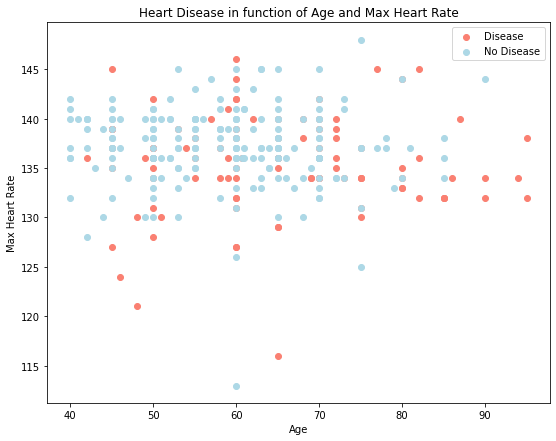

In [65]:
plt.figure(figsize=(9, 7))
plt.scatter(data.age[data.DEATH_EVENT==1],
            data.serum_sodium[data.DEATH_EVENT==1],
            c="salmon")
plt.scatter(data.age[data.DEATH_EVENT==0],
            data.serum_sodium[data.DEATH_EVENT==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(13.5, -0.5)

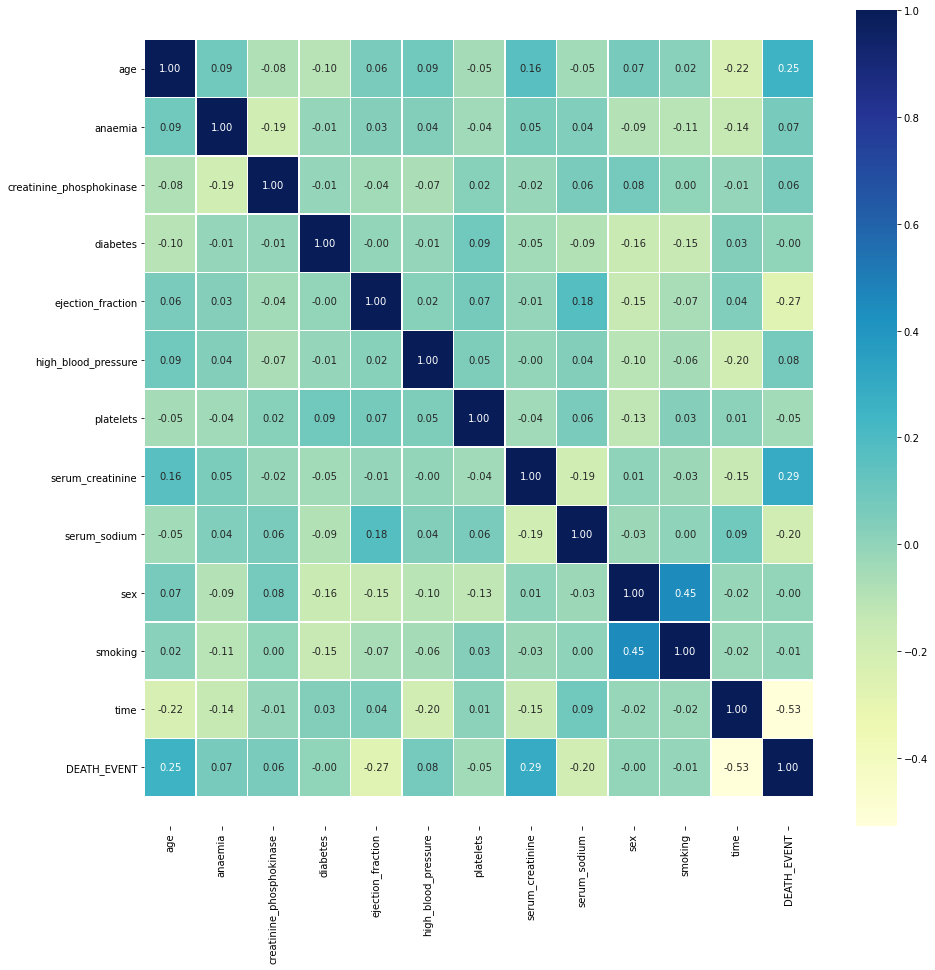

In [66]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [67]:
data.drop('DEATH_EVENT', axis=1).corrwith(data.DEATH_EVENT).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

### Checking missing values

In [72]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [75]:
x = data.drop(columns='DEATH_EVENT')
y = data['DEATH_EVENT']


In [80]:

dataset = pd.get_dummies(data, columns = categorical_val)

In [81]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


In [82]:
print(data.columns)
print(dataset.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT', 'anaemia_0',
       'anaemia_1', 'diabetes_0', 'diabetes_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'sex_0', 'sex_1', 'smoking_0', 'smoking_1'],
      dtype='object')


In [83]:
dataset.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.00,582,20,265000.00,1.90,130,4,1,1,0,1,0,0,1,0,1,1,0
1,55.00,7861,38,263358.03,1.10,136,6,1,1,0,1,0,1,0,0,1,1,0
2,65.00,146,20,162000.00,1.30,129,7,1,1,0,1,0,1,0,0,1,0,1
3,50.00,111,20,210000.00,1.90,137,7,1,0,1,1,0,1,0,0,1,1,0
4,65.00,160,20,327000.00,2.70,116,8,1,0,1,0,1,1,0,1,0,1,0


###  Feature Importance

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

[0.09198989 0.07333525 0.12860117 0.06676439 0.10785925 0.08459308
 0.27898686 0.01561192 0.01663406 0.01942459 0.01945654 0.01464607
 0.01613399 0.0155516  0.01681812 0.01596469 0.01762849]


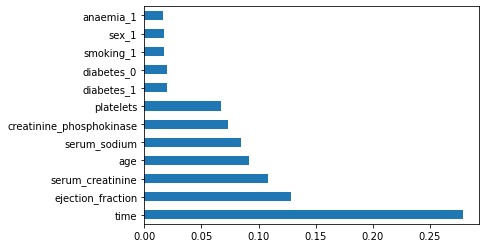

In [100]:
x = dataset.drop(columns='DEATH_EVENT')
y = dataset['DEATH_EVENT']

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [101]:
feat_importances*100

age                         9.20
creatinine_phosphokinase    7.33
ejection_fraction          12.86
platelets                   6.68
serum_creatinine           10.79
serum_sodium                8.46
time                       27.90
anaemia_0                   1.56
anaemia_1                   1.66
diabetes_0                  1.94
diabetes_1                  1.95
high_blood_pressure_0       1.46
high_blood_pressure_1       1.61
sex_0                       1.56
sex_1                       1.68
smoking_0                   1.60
smoking_1                   1.76
dtype: float64

In [102]:
sum(feat_importances.nlargest(6))

0.7653655044833467

### Splitting the data and Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [103]:
inp_data =dataset.iloc[:,[0,2,4,7,8,11]]
out_data = dataset[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 6)
X_test Shape  :  (60, 6)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


### Building a model and evaluating it

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

In [106]:
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 1.0000
Decision Tree Classifier f1-score      : 1.0000
Decision Tree Classifier precision     : 1.0000
Decision Tree Classifier recall        : 1.0000
Decision Tree Classifier roc auc score : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



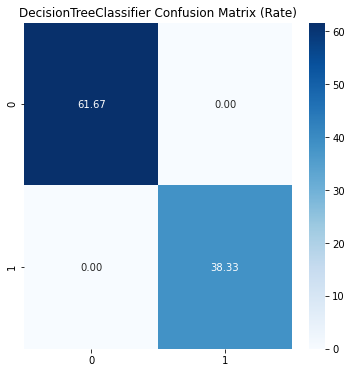

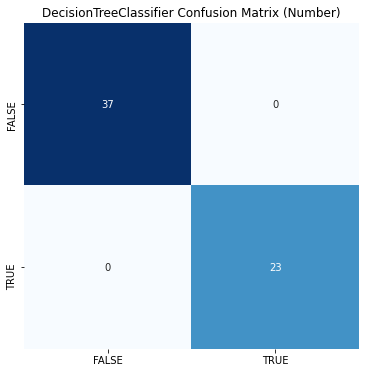

In [107]:
plt.figure(figsize=(6,6))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

### Hyperparameter tuning using GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001, 0.01, 0.1, 0.2, 0.02, 0.002],
    "criterion": ["gini", "entropy", None],
    "max_leaf_nodes": np.arange(1,10),
    "class_weight": ["balanced", None]
}

clf_2 = DecisionTreeClassifier()
grid = GridSearchCV(clf_2, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

### Implementing the Hyperparameters

Accuracy Score: 1.0000
Decision Tree Classifier f1-score      : 1.0000
Decision Tree Classifier precision     : 1.0000
Decision Tree Classifier recall        : 1.0000
Decision Tree Classifier roc auc score : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



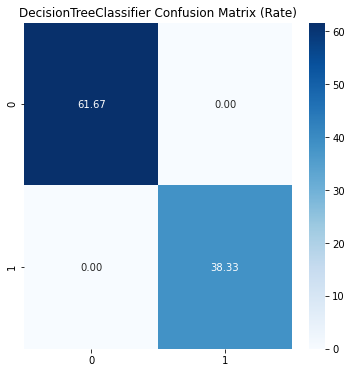

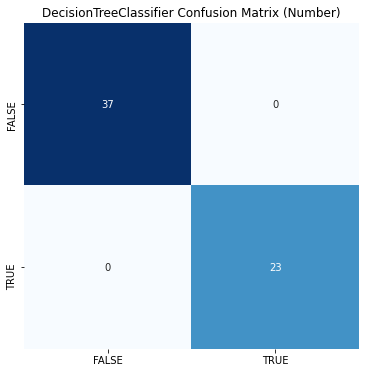

In [108]:
clf_2 = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=1,
    max_leaf_nodes=2,
    min_samples_split=0.001,
    random_state=0
)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
    
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

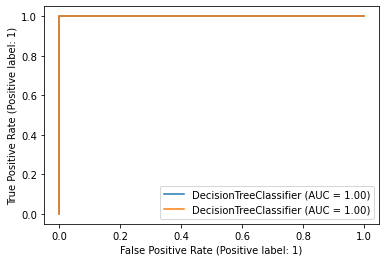

In [109]:
from sklearn.metrics import plot_roc_curve
fig = plot_roc_curve(clf_1, X_test, y_test)
fig = plot_roc_curve(clf_2, X_test, y_test, ax = fig.ax_)
plt.show()

## Deploying the model

### Dumping the model

In [110]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(clf_2, open(filename, 'wb'))

### Loading the model

In [39]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0
